# Load CSV file needed for analysis and import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


We will load following files downloaded from FAO website, those are the same files we used for project 4. 

1. first file: food_balance_total.csv
2. second file: food_balance_item_group.csv

Also in terms of data cleaning and customizing, we will initially use same code that we used for project 4 below and then do manipulation based on our needs for this project.

In [2]:
total = pd.read_csv("food_balance_total.csv",encoding = "ISO-8859-1", engine='python')
item_group = pd.read_csv("food_balance_item_group.csv")


total=total.merge(item_group, on='Item Code', how='left')
animal=total.loc[total['Item Group Code'] ==2941]
vegetal=total.loc[total['Item Group Code'] ==2903]
animal.to_csv('food_balance_animal.csv')
vegetal.to_csv('food_balance_vegetal.csv')
ani = pd.read_csv("food_balance_animal.csv")
veg = pd.read_csv("food_balance_vegetal.csv")
ani=ani.drop(['Unnamed: 0','Item Group Code', 'Item Group', 'Item_y', 'Factor', 'HS Code','HS07 Code', 'HS12 Code', 'CPC Code'], axis=1)
veg=veg.drop(['Unnamed: 0','Item Group Code', 'Item Group', 'Item_y', 'Factor', 'HS Code','HS07 Code', 'HS12 Code', 'CPC Code'], axis=1)
# Adds variable ‘origin’
veg["origin"] = "vegetal"
ani["origin"] = "animal"
# Adds variable ‘origin’
veg["origin"] = "vegetal"
ani["origin"] = "animal"
# Appends veg and ani to one dataframe
temp = ani.append(veg)
# Deletion of ani and veg file
del ani, veg
# Renaming of temp’s columns
temp.columns = ["country_code", "country",'item_code','item','x1','element','x2','year','unit','value','x3','origin']
# Transformation of ‘temp’ to a pivot table
data = temp.pivot_table(
index=["country_code", "country", "item_code", "item", "year", "origin"],
columns = ["element"], values=["value"], aggfunc=sum)
# Renaming of data’s columns (be careful, the order of the columns needs
# to be adapted to your own data !)
data.columns = ['domestic_supply_quantity', 'export_quantity','fat_supply_quantity_gcapitaday','feed',
'food', 'food_supply_kcalcapitaday','food_supply_quantity_kgcapitayr', 'import_quantity','losses', 'other_uses',
'processing', 'production', 'protein_supply_quantity_gcapitaday','residuals','seed', 'stock_variation', 'tourist_consumption']
# Index columns need to be normal columns

## "data" dataframe below will be the combined dataframe which will be manipulated into smaller dataframe based on needs

data = data.reset_index()
data.columns
data.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,feed,...,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,tourist_consumption
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,3.90,110.0,...,344.0,30.0,0.0,16.0,338.0,33.01,46.0,32.0,42.0,NaN
1,1,Armenia,2511,Wheat and products,2015,vegetal,748.0,2.0,4.02,125.0,...,324.0,59.0,0.0,16.0,363.0,33.07,106.0,33.0,-63.0,NaN
2,1,Armenia,2511,Wheat and products,2016,vegetal,650.0,1.0,4.22,128.0,...,312.0,64.0,0.0,17.0,350.0,34.70,-22.0,33.0,11.0,NaN
3,1,Armenia,2511,Wheat and products,2017,vegetal,547.0,1.0,4.28,105.0,...,337.0,15.0,0.0,16.0,176.0,34.36,-42.0,25.0,-34.0,NaN
4,1,Armenia,2511,Wheat and products,2018,vegetal,571.0,1.0,4.40,118.0,...,379.0,16.0,0.0,16.0,187.0,34.25,-27.0,20.0,-5.0,NaN


In [3]:
# only take columns needed for analysis later
data.columns

data=data[['country_code', 'country','item', 'year', 'origin',
       'domestic_supply_quantity','food_supply_kcalcapitaday', 'food_supply_quantity_kgcapitayr',
       'protein_supply_quantity_gcapitaday']]

In [4]:
## check if we don't have any missing value 

data.info()

## yes it seems there are missing values so let's get rid of it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98729 entries, 0 to 98728
Data columns (total 9 columns):
country_code                          98729 non-null int64
country                               98729 non-null object
item                                  98729 non-null object
year                                  98729 non-null int64
origin                                98729 non-null object
domestic_supply_quantity              98729 non-null float64
food_supply_kcalcapitaday             89580 non-null float64
food_supply_quantity_kgcapitayr       90231 non-null float64
protein_supply_quantity_gcapitaday    89694 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.8+ MB


In [5]:

data=data.dropna()
data.info()
## now there is no NA value in this dataframe!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89580 entries, 0 to 98728
Data columns (total 9 columns):
country_code                          89580 non-null int64
country                               89580 non-null object
item                                  89580 non-null object
year                                  89580 non-null int64
origin                                89580 non-null object
domestic_supply_quantity              89580 non-null float64
food_supply_kcalcapitaday             89580 non-null float64
food_supply_quantity_kgcapitayr       89580 non-null float64
protein_supply_quantity_gcapitaday    89580 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.8+ MB


* To get population dataframe, we use same code that was used for project 4. We know already that there is a duplicate value in China, so we are going to keep this code line.

In [6]:
population = total [total.Flag != 'A']
population = population.rename(columns = {'Area Code': 'Area_Code'})
# Get rid of data on China using area code 351
population= population[population.Area_Code!= 351]
population= population[population.Element== 'Total Population - Both sexes']
population=population[['Area', 'Value','Year']]
population['Value']=population['Value']*1000
population = population.rename(columns = {'Area': 'country', 'Value': 'population','Year':'year'}, inplace = False)
population_by_year=population.groupby('year')['population'].sum()
population_by_year=population_by_year.reset_index()
pd.set_option('float_format', '{:f}'.format)
population.head()

,country,population,year
0,Afghanistan,33371000.000000,2014
1,Afghanistan,34414000.000000,2015
2,Afghanistan,35383000.000000,2016
3,Afghanistan,36296000.000000,2017
4,Afghanistan,37172000.000000,2018


In [7]:
population.country.value_counts()

Congo                                 5
Armenia                               5
China, Hong Kong SAR                  5
Albania                               5
Solomon Islands                       5
                                     ..
Venezuela (Bolivarian Republic of)    5
Lebanon                               5
China, mainland                       5
Viet Nam                              5
Saint Lucia                           5
Name: country, Length: 173, dtype: int64

In [8]:
population.groupby('year')['population'].sum()

## seems that population data here seems correct, we will use this dataframe to clean up data dataframe

year
2014   7131485000.000000
2015   7212776000.000000
2016   7293574000.000000
2017   7373798000.000000
2018   7453133000.000000
Name: population, dtype: float64

In [9]:
## now let's just put aside of countries dataframe so that we have data for later on in case we need country list
countries=population['country'].value_counts().to_frame()
countries['country']=countries['country'].astype(str)
countries=countries.reset_index()

In [10]:
countries.columns

Index(['index', 'country'], dtype='object')

In [11]:
countries=countries.rename(columns={"index": "country", "country": "number"})
countries

,country,number
0,Congo,5
1,Armenia,5
2,"China, Hong Kong SAR",5
3,Albania,5
4,Solomon Islands,5
...,...,...
168,Venezuela (Bolivarian Republic of),5
169,Lebanon,5
170,"China, mainland",5
171,Viet Nam,5


In [12]:
## clean the data based on country list 

data_cleaned=pd.merge(data,countries,on='country')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72974 entries, 0 to 72973
Data columns (total 10 columns):
country_code                          72974 non-null int64
country                               72974 non-null object
item                                  72974 non-null object
year                                  72974 non-null int64
origin                                72974 non-null object
domestic_supply_quantity              72974 non-null float64
food_supply_kcalcapitaday             72974 non-null float64
food_supply_quantity_kgcapitayr       72974 non-null float64
protein_supply_quantity_gcapitaday    72974 non-null float64
number                                72974 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 6.1+ MB


# 2. Preparing Samples of Countries


    

1) Difference in Poluation dataframe\
- Difference in population between a previous year (elective) and the current year, expressed as a percentage.= we will manipulate polulation dataframe we made previously.

For below 5 variables, we will you 'data_cleaned' dataframe that we previously obtained and manipulate to get what we need.\
2) Proportion of animal proteins compared to the total amount of proteins available in the country.\
3) Food availability in protein per capita.\
4) Food availability in calories per capita.\
5) Poultry consmuption trend (previous 5 years)\
6) Poultry domestic supply

For GDP variable, we will use dowloaded data from FAO\
7) GDP per capita- each country\
After we gain each of data frame, we will put them together and filter data to make short list of targeted countries.



## 2.1 Difference in population between previous year and current year and expressed as a percentage

In [13]:
## checking out population dataframe to have an idea how to manipulate data to get population difference, it seems we have population per year 2014,2015,2016,2017,2018

population.head()

,country,population,year
0,Afghanistan,33371000.000000,2014
1,Afghanistan,34414000.000000,2015
2,Afghanistan,35383000.000000,2016
3,Afghanistan,36296000.000000,2017
4,Afghanistan,37172000.000000,2018


In [14]:
# check if there is missing or NA value

population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 2962069
Data columns (total 3 columns):
country       865 non-null object
population    865 non-null float64
year          865 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.0+ KB


In [15]:
population.country.value_counts()

## 173 countries in the list


Congo                                 5
Armenia                               5
China, Hong Kong SAR                  5
Albania                               5
Solomon Islands                       5
                                     ..
Venezuela (Bolivarian Republic of)    5
Lebanon                               5
China, mainland                       5
Viet Nam                              5
Saint Lucia                           5
Name: country, Length: 173, dtype: int64

In [16]:
## we will only get 2017, 2018 population data to calculate population difference

population_cleaned = population[(population['year'] >=2017) ]

In [17]:
population_cleaned['population_difference']=population_cleaned.population.pct_change()*100


C:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
## we will see now year 2017,2018 and population difference column, now we will only extract last year 2018 to get most recent year for population and keep population difference percentage

population_cleaned

,country,population,year,population_difference
3,Afghanistan,36296000.000000,2017,nan
4,Afghanistan,37172000.000000,2018,2.413489
15673,Albania,2884000.000000,2017,-92.241472
15674,Albania,2883000.000000,2018,-0.034674
31141,Algeria,41389000.000000,2017,1335.622615
...,...,...,...,...
2924846,Yemen,28499000.000000,2018,2.385486
2943590,Zambia,16854000.000000,2017,-40.861083
2943591,Zambia,17352000.000000,2018,2.954788
2962068,Zimbabwe,14237000.000000,2017,-17.951821


In [19]:
population_difference_per_country= population_cleaned[(population_cleaned['year'] >=2018) ]

* data frame made with population difference(2017VS2018) for each country

In [20]:
## checking out last result!

population_difference_per_country.head()

,country,population,year,population_difference
4,Afghanistan,37172000.000000,2018,2.413489
15674,Albania,2883000.000000,2018,-0.034674
31142,Algeria,42228000.000000,2018,2.027109
47562,Angola,30810000.000000,2018,3.330315
65563,Antigua and Barbuda,96000.000000,2018,1.052632


In [21]:
## meantime, let's just put aside 'popualtion' dataframe, in case we only want to have population data, not a percentage for later on.

population=population_cleaned[(population_cleaned['year'] >=2018) ]
population=population[['country','population','year']]
population.head()

,country,population,year
4,Afghanistan,37172000.000000,2018
15674,Albania,2883000.000000,2018
31142,Algeria,42228000.000000,2018
47562,Angola,30810000.000000,2018
65563,Antigua and Barbuda,96000.000000,2018


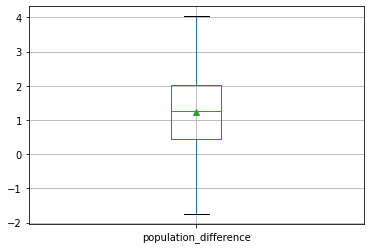

1.240687651475247


In [22]:
# check out mean growth of population worldwide to see mean value

population_difference_per_country[["population_difference"]].boxplot(whis=3,showmeans=True)
mean = population_difference_per_country['population_difference'].mean()
plt.show()
print(mean)

In [23]:
country_list=population_difference_per_country['country']
country_list=country_list.to_frame()
country_list

,country
4,Afghanistan
15674,Albania
31142,Algeria
47562,Angola
65563,Antigua and Barbuda
...,...
2887962,Venezuela (Bolivarian Republic of)
2906731,Viet Nam
2924846,Yemen
2943591,Zambia


## 2.2 Proportion of animal proteins compared to the total amount of protein available in the country

In [24]:
## let's check data_cleaned data frame's columns to see how we could filter out only columns we need for variable.
data_cleaned.columns

Index(['country_code', 'country', 'item', 'year', 'origin',
       'domestic_supply_quantity', 'food_supply_kcalcapitaday',
       'food_supply_quantity_kgcapitayr', 'protein_supply_quantity_gcapitaday',
       'number'],
      dtype='object')

In [25]:
## filter only column that is needed and also filter only 2018 to get most recent year data only

animal_pro_vs_all=data_cleaned[['country', 'item','year','origin','protein_supply_quantity_gcapitaday']]
animal_pro_vs_all= animal_pro_vs_all[animal_pro_vs_all['year']==2018]

In [26]:
animal_pro_vs_all.head()

,country,item,year,origin,protein_supply_quantity_gcapitaday
4,Armenia,Wheat and products,2018,vegetal,34.250000
9,Armenia,Barley and products,2018,vegetal,0.200000
14,Armenia,Maize and products,2018,vegetal,0.030000
19,Armenia,Rye and products,2018,vegetal,0.030000
24,Armenia,Oats,2018,vegetal,0.230000


In [27]:
animal_protein_proportion=animal_pro_vs_all.groupby(['country', 'origin'])['protein_supply_quantity_gcapitaday'].sum()


In [28]:
animal_protein_proportion=animal_protein_proportion.to_frame()
animal_protein_proportion=animal_protein_proportion.reset_index()
animal_protein_proportion.head()

,country,origin,protein_supply_quantity_gcapitaday
0,Afghanistan,animal,10.790000
1,Afghanistan,vegetal,44.710000
2,Albania,animal,61.740000
3,Albania,vegetal,53.930000
4,Algeria,animal,24.720000


In [29]:
animal_protein_proportion=pd.pivot_table(animal_protein_proportion,index=["country"],values=["protein_supply_quantity_gcapitaday"],
               columns=["origin"],aggfunc=[np.sum])


In [30]:
animal_protein_proportion.columns

MultiIndex([('sum', 'protein_supply_quantity_gcapitaday',  'animal'),
            ('sum', 'protein_supply_quantity_gcapitaday', 'vegetal')],
           names=[None, None, 'origin'])

In [31]:
animal_protein_proportion.columns = ['animal_protein_gcapitaday', 'vegetal_protein_gcapitaday']

In [32]:
animal_protein_proportion['animal_protein_vs_total_protein']=animal_protein_proportion['animal_protein_gcapitaday']/(animal_protein_proportion['animal_protein_gcapitaday']+animal_protein_proportion['vegetal_protein_gcapitaday'])
animal_protein_proportion=animal_protein_proportion.fillna(0)
animal_protein_proportion = pd.merge(left=animal_protein_proportion, right=country_list, left_on='country', right_on='country')
animal_protein_proportion['animal_protein_vs_total_protein']=animal_protein_proportion['animal_protein_vs_total_protein']*100

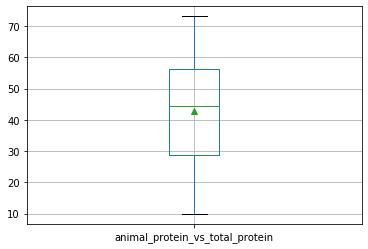

42.92482169040531


In [33]:
animal_protein_proportion[["animal_protein_vs_total_protein"]].boxplot(whis=3,showmeans=True)
mean_animal_protein_proportion=animal_protein_proportion["animal_protein_vs_total_protein"].mean()
plt.show()
print(mean_animal_protein_proportion)

## 2.3 Food Availability in Protein Per Capita


In [34]:
food_availability_protein_capita= data_cleaned[(data_cleaned['year'] >=2018)]
food_availability_protein_capita=food_availability_protein_capita[['country','origin','year','protein_supply_quantity_gcapitaday']]
food_availability_protein_capita=food_availability_protein_capita.groupby('country')['protein_supply_quantity_gcapitaday'].sum()
food_availability_protein_capita=food_availability_protein_capita.to_frame()
food_availability_protein_capita=food_availability_protein_capita.reset_index()
food_availability_protein_capita = pd.merge(left=food_availability_protein_capita, right=country_list, left_on='country', right_on='country')
food_availability_protein_capita

,country,protein_supply_quantity_gcapitaday
0,Afghanistan,55.500000
1,Albania,115.670000
2,Algeria,91.820000
3,Angola,53.050000
4,Antigua and Barbuda,79.910000
...,...,...
168,Venezuela (Bolivarian Republic of),54.170000
169,Viet Nam,98.570000
170,Yemen,54.500000
171,Zambia,60.500000


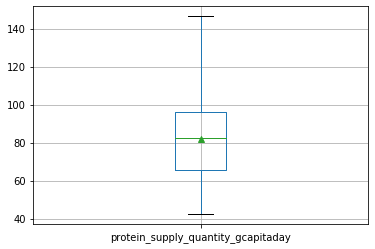

81.79687861271674


In [35]:
food_availability_protein_capita[["protein_supply_quantity_gcapitaday"]].boxplot(whis=3,showmeans=True)
food_availability_protein_capita_mean=food_availability_protein_capita["protein_supply_quantity_gcapitaday"].mean()
plt.show()
print(food_availability_protein_capita_mean)

## 2.4 Food Availability in Kcal Per Capita

In [36]:
food_availability_kcal_capita= data_cleaned[(data_cleaned['year'] >=2018)]
food_availability_kcal_capita=food_availability_kcal_capita[['country','origin','year','food_supply_kcalcapitaday']]
food_availability_kcal_capita=food_availability_kcal_capita.groupby('country')['food_supply_kcalcapitaday'].sum()
food_availability_kcal_capita=food_availability_kcal_capita.to_frame()
food_availability_kcal_capita=food_availability_kcal_capita.reset_index()
food_availability_kcal_capita = pd.merge(left=food_availability_kcal_capita, right=country_list, left_on='country', right_on='country')
food_availability_kcal_capita

,country,food_supply_kcalcapitaday
0,Afghanistan,2038.000000
1,Albania,3361.000000
2,Algeria,3321.000000
3,Angola,2383.000000
4,Antigua and Barbuda,2442.000000
...,...,...
168,Venezuela (Bolivarian Republic of),2120.000000
169,Viet Nam,3023.000000
170,Yemen,2152.000000
171,Zambia,2000.000000


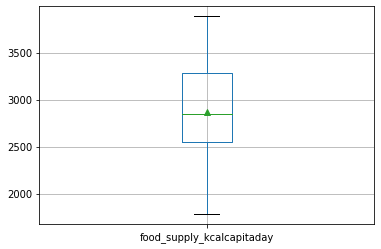

2867.843930635838


In [37]:
food_availability_kcal_capita[["food_supply_kcalcapitaday"]].boxplot(whis=3,showmeans=True)
food_availability_kcal_capita_mean=food_availability_kcal_capita["food_supply_kcalcapitaday"].mean()
plt.show()
print(food_availability_kcal_capita_mean)

## 2.5 GDP per country

* Download GDP CSV file from FAO website

In [38]:
# again let's bring country list so that we could do join later so that we only get GDP data for countires that we will study
country_list.head()

,country
4,Afghanistan
15674,Albania
31142,Algeria
47562,Angola
65563,Antigua and Barbuda


In [39]:
gdp_per_country = pd.read_csv("gdp_per_country.csv")
gdp_per_country=gdp_per_country[['Area','Value']]
gdp_per_country.rename(columns={'Area': 'country', 'Value': 'gdp'}, inplace=True)
gdp_per_country=gdp_per_country.sort_values(by='gdp', ascending=False)
gdp_per_country = pd.merge(left=gdp_per_country, right=country_list, left_on='country', right_on='country')
gdp_per_country

,country,gdp
0,Luxembourg,120137.955478
1,"China, Macao SAR",86248.547881
2,Switzerland,82530.174862
3,Norway,81101.658048
4,Ireland,79661.622685
...,...,...
167,Madagascar,527.386601
168,Mozambique,482.063443
169,Central African Republic,473.499434
170,Liberia,437.118973


In [40]:
gdp_per_country.to_csv('gdp_check.csv')

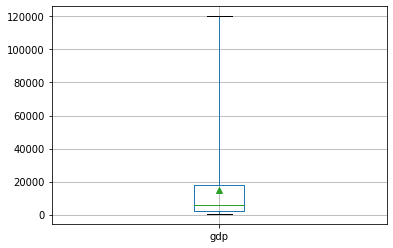

14738.507210906968


In [41]:
gdp_per_country[["gdp"]].boxplot(whis=15,showmeans=True)
gdp_mean=gdp_per_country["gdp"].mean()
plt.show()
print(gdp_mean)


## 2.6 Poultry Supply Trend

* we will make average of 2014-2018 poulty consumption trend so that we see how latest poultry consumption trend could be guessed.
* Here we are using column 'domestic_supply_quantity' which equals to production+import-export of poultry meat. This does not tell us directly how many are consumped, but based on supply q'ty we could guess probably consumption trend as well indirectly.

In [42]:
poultry_supply_trend = data_cleaned[(data_cleaned['year'] >=2013) ]
poultry_supply_trend=poultry_supply_trend[(poultry_supply_trend['item'] =='Poultry Meat')]
poultry_supply_trend=poultry_supply_trend[['country', 'year','domestic_supply_quantity']]


poultry_supply_trend=pd.pivot_table(poultry_supply_trend,index=["country"],values=["domestic_supply_quantity"],columns=["year"],aggfunc=[np.sum])

poultry_supply_trend=poultry_supply_trend.reset_index()

poultry_supply_trend.columns = ['country', '2014','2015','2016','2017','2018']
poultry_supply_trend=poultry_supply_trend.set_index('country')
poultry_supply_trend=poultry_supply_trend.pct_change(axis='columns')
poultry_supply_trend['five_year_average']=(poultry_supply_trend['2015']+poultry_supply_trend['2016']+poultry_supply_trend['2017']+poultry_supply_trend['2018'])/4
poultry_supply_trend['five_year_average']
poultry_supply_trend

,2014,2015,2016,2017,2018,five_year_average
country,,,,,,
Afghanistan,nan,-0.040541,-0.112676,-0.095238,-0.070175,-0.079658
Albania,nan,0.000000,0.147059,-0.153846,-0.181818,-0.047151
Algeria,nan,0.023026,0.028939,-0.050000,-0.029605,-0.006910
Angola,nan,-0.367397,-0.057692,0.240816,0.190789,0.001629
Antigua and Barbuda,nan,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),nan,-0.279635,-0.303797,-0.263636,-0.072016,-0.229771
Viet Nam,nan,0.059970,0.019802,0.000000,0.052705,0.033119
Yemen,nan,-0.342105,-0.120000,-0.075758,0.516393,-0.005367


In [43]:
poultry_supply_trend=poultry_supply_trend.reset_index()
poultry_supply_trend=poultry_supply_trend[['country', 'five_year_average']]
poultry_supply_trend = pd.merge(left=poultry_supply_trend, right=country_list, left_on='country', right_on='country')
poultry_supply_trend

,country,five_year_average
0,Afghanistan,-0.079658
1,Albania,-0.047151
2,Algeria,-0.006910
3,Angola,0.001629
4,Antigua and Barbuda,0.000000
...,...,...
168,Venezuela (Bolivarian Republic of),-0.229771
169,Viet Nam,0.033119
170,Yemen,-0.005367
171,Zambia,0.032705


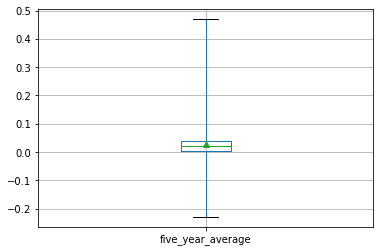

0.02944372192541258


In [44]:
poultry_supply_trend[["five_year_average"]].boxplot(whis=15,showmeans=True)
trend_mean=poultry_supply_trend["five_year_average"].mean()
plt.show()

print(trend_mean)


## 2.7 Poultry Domestic Supply Per Capita

In [45]:
population_2018 = population_cleaned[population_cleaned['year']==2018]
population_2018.population.sum()

7453133000.0

In [46]:
# take out domestic supply quantity by country which is equal to production+import-export

poultry_data=data[['country','item','year','domestic_supply_quantity']]
poultry_data= poultry_data[(poultry_data['year'] >=2018)]
poultry_data=poultry_data[(poultry_data['item'] =='Poultry Meat')]
population_2018 = population[(population['year'] >=2018) ]
poultry_data=pd.merge(left=poultry_data, right=population_2018, left_on='country', right_on='country')
#poultry_data=poultry_data.sort_values(by='food', ascending=False).head(35)
poultry_data=poultry_data.sort_values(by='domestic_supply_quantity')
poultry_data=poultry_data[['country','item','domestic_supply_quantity']]
poultry_data = pd.merge(left=poultry_data, right=population_2018, left_on='country', right_on='country')
poultry_data=poultry_data[['country','item','domestic_supply_quantity','population']]
poultry_data['poultry_supply_per_cap']=poultry_data['domestic_supply_quantity']*1000000/poultry_data['population']
poultry_data.head()

#poultry_data.to_csv('poultry_data.csv')

,country,item,domestic_supply_quantity,population,poultry_supply_per_cap
0,Sao Tome and Principe,Poultry Meat,2.000000,211000.000000,9.478673
1,Kiribati,Poultry Meat,2.000000,116000.000000,17.241379
2,Solomon Islands,Poultry Meat,3.000000,653000.000000,4.594181
3,Djibouti,Poultry Meat,3.000000,959000.000000,3.128259
4,Guinea-Bissau,Poultry Meat,4.000000,1874000.000000,2.134472


In [47]:
poultry_data['poultry_supply_per_cap'].mean()



22.327365704386697

Text(24.56010227482537, 34.019999999999996, 'Mean: 22.33')

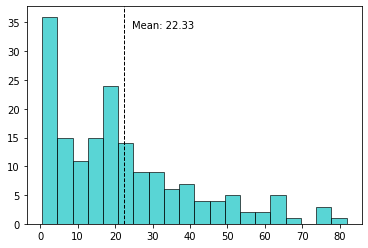

In [48]:
## Let's figure out mean figure for domestic supply of poultry meat in order to filter data
## normally world average poultry consumption is around 15.6kg according to google search


result = plt.hist(poultry_data["poultry_supply_per_cap"], bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(poultry_data["poultry_supply_per_cap"].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(poultry_data["poultry_supply_per_cap"].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(poultry_data["poultry_supply_per_cap"].mean()))

# 3. Making Dendogram containing all the studies countries - split into Five Groups

## 3.1 Dendogram -with seven variables

* First we will create one integrated dataframe based on varialbes we collected from 2.1 to 2.6 before we create dendogram


In [49]:
#from functools import reduce

df1=population_difference_per_country
df2=animal_protein_proportion
df3=food_availability_protein_capita
df3=df3.groupby('country')['protein_supply_quantity_gcapitaday'].sum()
df3= pd.DataFrame(data = df3)
df4=food_availability_kcal_capita
df4=df4.groupby('country')['food_supply_kcalcapitaday'].sum()
df4= pd.DataFrame(data = df4) 
df5=gdp_per_country
df6=poultry_supply_trend

total_data=pd.merge(poultry_data,df1,on='country',how='inner')
total_data=pd.merge(total_data,df2,on='country',how='inner')
total_data=pd.merge(total_data,df3,on='country',how='inner')
total_data=pd.merge(total_data,df4,on='country',how='inner')
total_data=pd.merge(total_data,df5,on='country',how='inner')
total_data=pd.merge(total_data,df6,on='country',how='inner')


total_data=total_data[['country','population_difference','animal_protein_vs_total_protein','protein_supply_quantity_gcapitaday','food_supply_kcalcapitaday','gdp','five_year_average','poultry_supply_per_cap']]
#Missing value Taiwan GDP- fillna
total_data=total_data.fillna(30981)
total_data=total_data.set_index('country')
total_data.head()


,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
country,,,,,,,
Sao Tome and Principe,1.932367,30.451542,54.480000,2447.000000,1968.732492,0.000000,9.478673
Kiribati,1.754386,49.014008,73.530000,3078.000000,1592.082641,0.000000,17.241379
Solomon Islands,2.672956,28.929042,53.130000,2412.000000,2039.282045,0.000000,4.594181
Djibouti,1.588983,21.401313,65.510000,2695.000000,3009.407574,0.125000,3.128259
Guinea-Bissau,2.516411,21.304650,43.230000,2229.000000,764.899506,0.000000,2.134472


In [50]:

from functools import reduce

* Standardize data set

In [51]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering
# Import functions created for this course
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

X=total_data
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.61960089, -0.78065082, -1.31621295, ..., -0.62260072,
        -0.44612718, -0.67719892],
       [ 0.45878085,  0.38526051, -0.39747687, ..., -0.64096458,
        -0.44612718, -0.26557756],
       [ 1.28878135, -0.87627927, -1.38132023, ..., -0.61916101,
        -0.44612718, -0.93620154],
       ...,
       [-0.41561287,  0.83655336,  0.66980027, ..., -0.2865367 ,
        -0.11951994,  1.3149086 ],
       [-0.56748469,  1.36960089,  1.53403914, ...,  2.3521207 ,
         0.05225337,  1.84272862],
       [-0.70512082, -0.2218115 ,  0.91479656, ..., -0.24971512,
        -0.24053851, -0.46601807]])

In [52]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True)

# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters)
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered

,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap,cluster
country,,,,,,,,
Sao Tome and Principe,0.619601,-0.780651,-1.316213,-0.920060,-0.622601,-0.446127,-0.677199,1
Kiribati,0.458781,0.385261,-0.397477,0.461685,-0.640965,-0.446127,-0.265578,2
Solomon Islands,1.288781,-0.876279,-1.381320,-0.996702,-0.619161,-0.446127,-0.936202,1
Djibouti,0.309326,-1.349097,-0.784262,-0.376997,-0.571862,1.445651,-1.013933,1
Guinea-Bissau,1.147331,-1.355169,-1.858774,-1.397430,-0.681295,-0.446127,-1.066629,1
...,...,...,...,...,...,...,...,...
Mexico,-0.102490,0.382622,0.466280,0.634677,-0.262421,0.074432,0.647221,4
Russian Federation,-0.999784,0.750372,0.947109,1.039784,-0.156230,-0.085074,0.489175,0
Brazil,-0.415613,0.836553,0.669800,0.947814,-0.286537,-0.119520,1.314909,0


In [53]:
# Find the size of the clusters
X_scaled_clustered["cluster"].value_counts()

1    57
0    47
2    35
4    27
3     6
Name: cluster, dtype: int64

* Here we are going to export CSV file for countries-cluster connection as it's required for project deliverables

In [55]:
country_cluster=X_scaled_clustered.reset_index()
country_cluster=country_cluster[['country','cluster']]
country_cluster
#country_cluster.to_csv('country_cluster.csv')

,country,cluster
0,Sao Tome and Principe,1
1,Kiribati,2
2,Solomon Islands,1
3,Djibouti,1
4,Guinea-Bissau,1
...,...,...
167,Mexico,4
168,Russian Federation,0
169,Brazil,0
170,United States of America,0


* Here below we are going to make dataframe of centroide and export in CSV as it is needed for project deliverable 

1) first we will make inner join with X=dendrogram dataframe and country_cluster so that we could add cluster on dataframe
2) second we will group data frame by cluster and check mean of it so that we could see characteristic of each cluster and decide which cluster to use for our further market study

In [56]:
centroide=pd.merge(total_data,country_cluster, on='country',how='inner')

In [57]:
centroide=centroide.groupby("cluster").mean()
centroide


,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
cluster,,,,,,,
0,0.462468,59.074212,106.413830,3378.106383,39636.719441,0.012880,29.258402
1,2.146201,26.526263,62.600000,2469.684211,2086.192444,0.019745,6.345442
2,0.844431,42.823153,85.275714,2980.371429,7315.000619,0.026821,17.607037
3,2.431819,28.760810,53.370000,2221.333333,1631.457992,0.282331,9.642548
4,0.970668,52.427690,81.118889,2813.629630,10643.358801,0.026173,52.445946


* Here we will see total piture of Dendrogram

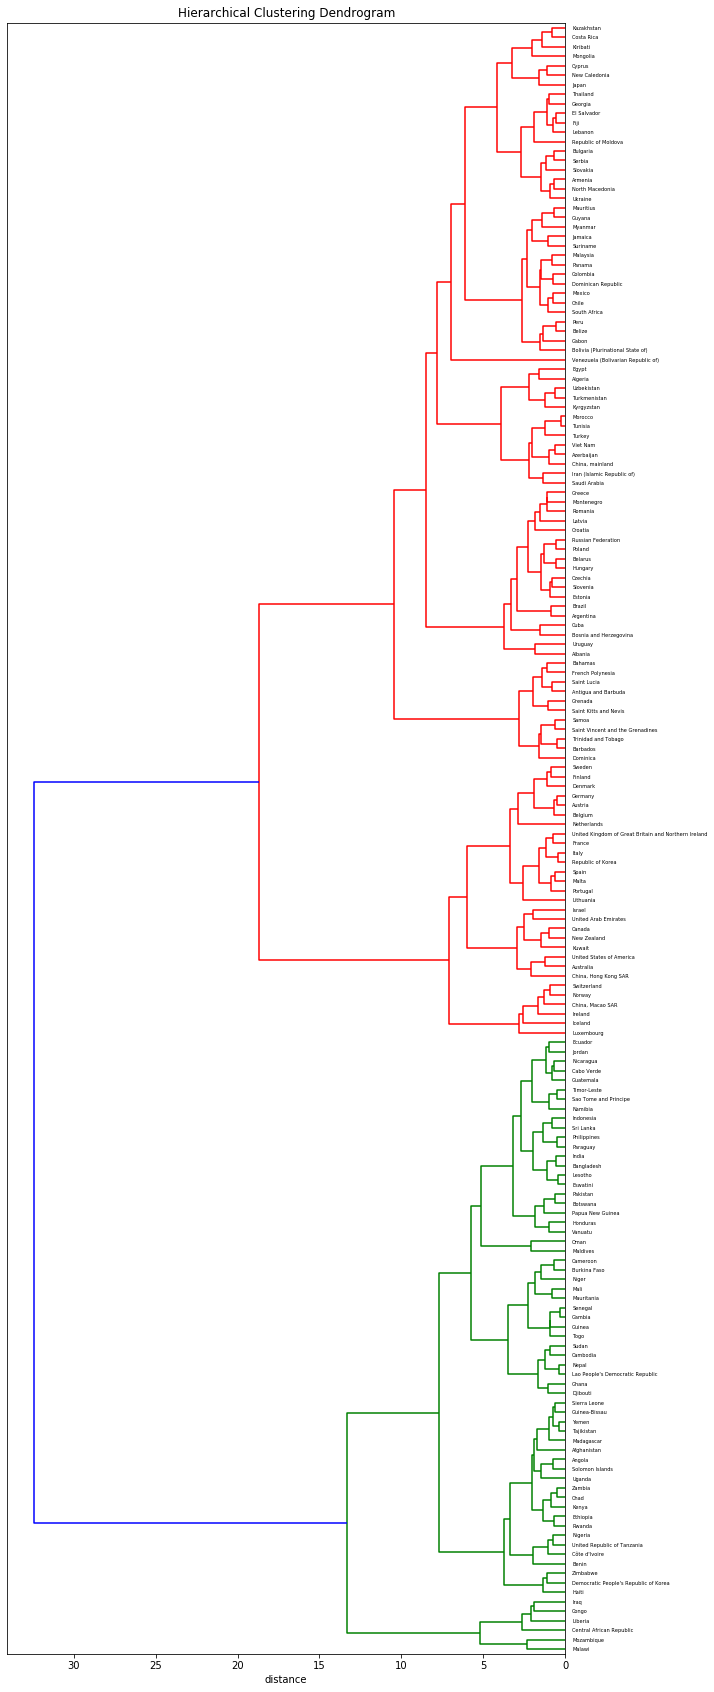

In [114]:
# see dendrogram tree for all studies countries : 172 countries
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Import functions created for this course
from functions import *
from scipy.cluster.hierarchy import linkage, fcluster 

sample = X_scaled_clustered
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,30))

#plt.savefig('dendrogram.png')

## 3.2 Make Short List Countries

* Now in previous chapter we were able to make dataframe with all countries(172) with their cluster. 

1) we want to investigate characteristic of each cluster, to see based on which features they were classified \
2) then we want to short list only 10-15 targeted countries so that we could narrow down out marketing extension target. \
3) lastly, we are going to visualize short list of countires with PCA

* in order to perform 1) lets bring centroide data frame and try to figure out each cluster's characteristic

In [59]:
centroide.head()

,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
cluster,,,,,,,
0,0.462468,59.074212,106.413830,3378.106383,39636.719441,0.012880,29.258402
1,2.146201,26.526263,62.600000,2469.684211,2086.192444,0.019745,6.345442
2,0.844431,42.823153,85.275714,2980.371429,7315.000619,0.026821,17.607037
3,2.431819,28.760810,53.370000,2221.333333,1631.457992,0.282331,9.642548
4,0.970668,52.427690,81.118889,2813.629630,10643.358801,0.026173,52.445946


* Here below, let's get list of country with clsuter  0 and 4.

In [60]:
potential_country=pd.merge(total_data,country_cluster,on='country')
potential_country.to_csv('potential_country.csv')
short_list_country=potential_country.loc[potential_country['cluster'].isin([0,4])]
short_list_country


,country,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap,cluster
5,Saint Kitts and Nevis,0.000000,64.222684,77.060000,2579.000000,18098.875957,0.000000,76.923077,4
8,Dominica,1.408451,55.548526,79.030000,2953.000000,7413.637732,0.062500,69.444444,4
9,Antigua and Barbuda,1.052632,64.747841,79.910000,2442.000000,15629.054576,0.000000,62.500000,4
10,Grenada,0.000000,56.683967,71.290000,2401.000000,10787.400403,0.008929,63.063063,4
17,Saint Vincent and the Grenadines,0.000000,56.138008,89.850000,2967.000000,7362.068966,0.031250,81.818182,4
...,...,...,...,...,...,...,...,...,...
165,Japan,-0.236073,55.681558,87.300000,2707.000000,39087.235938,0.013822,19.221396,0
167,Mexico,1.133222,48.972003,91.440000,3157.000000,9356.145765,0.034396,34.455706,4
168,Russian Federation,0.140177,54.826940,101.410000,3342.000000,11534.175152,0.023857,31.475153,0
169,Brazil,0.786686,56.199038,95.660000,3300.000000,8861.531858,0.021581,47.047534,0


* We are going to make short list of countries below
- filter only country with positive population growth in recent year
- filter only country with poultry supply is less than global average
- filter only country where they have five year supply less than global average
- filter only country with GRP more than mean

In [61]:
short_list_country=short_list_country.loc[(short_list_country['population_difference'] >0)                       
        & (short_list_country['poultry_supply_per_cap']  <= poultry_data['poultry_supply_per_cap'].mean())
        & (short_list_country['five_year_average']  <= poultry_supply_trend["five_year_average"].mean())
        & (short_list_country['gdp']  >= gdp_per_country["gdp"].mean())]
short_list_country


,country,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap,cluster
23,Luxembourg,2.027027,62.289935,108.300000,3470.000000,120137.955478,0.025000,18.211921,0
40,Estonia,0.303260,62.219475,105.160000,3247.000000,23528.804365,0.027803,21.919879,0
49,Uruguay,0.349142,53.531728,86.360000,3198.000000,17177.139135,-0.110281,9.857930,0
89,Norway,0.793051,59.957608,113.230000,3366.000000,81101.658048,0.011639,20.794305,0
93,Finland,0.217746,63.934565,117.980000,3340.000000,49955.341172,0.018269,20.822017,0
98,Switzerland,0.827815,62.801679,95.300000,3355.000000,82530.174862,0.003860,15.482055,0
105,Belgium,0.542907,58.763921,99.670000,3764.000000,47225.757205,0.013532,14.109040,0
106,Austria,0.804989,60.357634,109.050000,3694.000000,52047.260459,0.004482,19.795299,0
108,Sweden,0.676426,63.997346,105.520000,3182.000000,55704.968354,0.018070,18.953069,0
116,Netherlands,0.229129,65.567766,106.470000,3297.000000,53505.050866,-0.116643,13.716295,0


In [62]:
short_list_country.to_csv('short_list_country.csv')

## 3.3 Perform PCA

In [63]:
X_scaled

array([[ 0.61960089, -0.78065082, -1.31621295, ..., -0.62260072,
        -0.44612718, -0.67719892],
       [ 0.45878085,  0.38526051, -0.39747687, ..., -0.64096458,
        -0.44612718, -0.26557756],
       [ 1.28878135, -0.87627927, -1.38132023, ..., -0.61916101,
        -0.44612718, -0.93620154],
       ...,
       [-0.41561287,  0.83655336,  0.66980027, ..., -0.2865367 ,
        -0.11951994,  1.3149086 ],
       [-0.56748469,  1.36960089,  1.53403914, ...,  2.3521207 ,
         0.05225337,  1.84272862],
       [-0.70512082, -0.2218115 ,  0.91479656, ..., -0.24971512,
        -0.24053851, -0.46601807]])

Plot data before sclaing

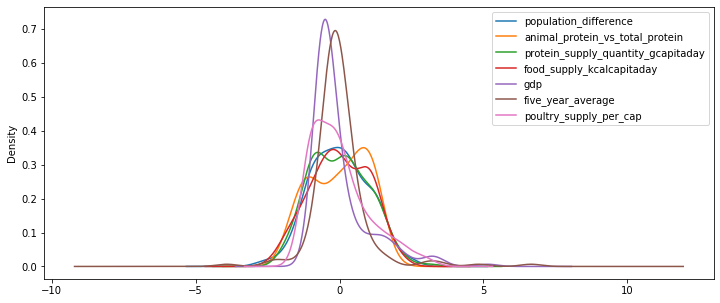

In [64]:
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

Perform a PCA on our standardised data:

In [65]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 7

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Analyze result

Array of the variance of the data explained by each of the 10 principal components, starting with PC1, the principal component that explains most of the variance.

In [66]:
pca.explained_variance_ratio_

array([0.5426636 , 0.14419034, 0.12070736, 0.09192886, 0.05911337,
       0.02806805, 0.01332842])

Express the explained variance ratio as a cumulative sum:

In [67]:

pca.explained_variance_ratio_.cumsum()

array([0.5426636 , 0.68685394, 0.8075613 , 0.89949016, 0.95860354,
       0.98667158, 1.        ])

Screeplot

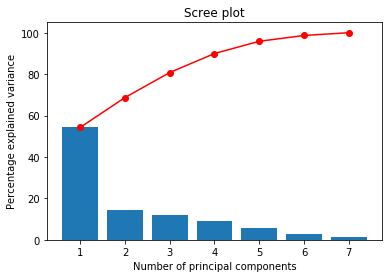

In [68]:
display_scree_plot(pca)

In [69]:

pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
# etc

In [70]:
X.columns

Index(['population_difference', 'animal_protein_vs_total_protein',
       'protein_supply_quantity_gcapitaday', 'food_supply_kcalcapitaday',
       'gdp', 'five_year_average', 'poultry_supply_per_cap'],
      dtype='object')

In [71]:
pc1

array([-0.34812328,  0.4533004 ,  0.46273663,  0.44073395,  0.38326453,
       -0.12108552,  0.32156479])

In [72]:
pc2 = pca.components_[1]
pc2

array([0.29904542, 0.02362032, 0.13287234, 0.11747521, 0.17026755,
       0.91815161, 0.08102476])

Correlation Circle

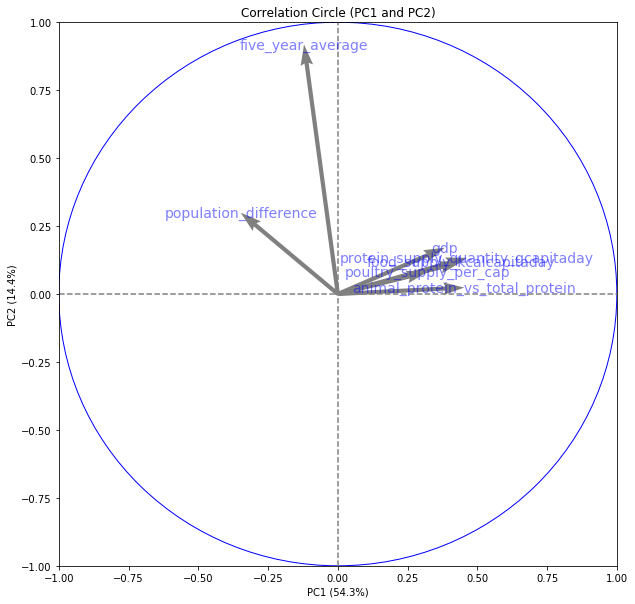

In [73]:

# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns),)

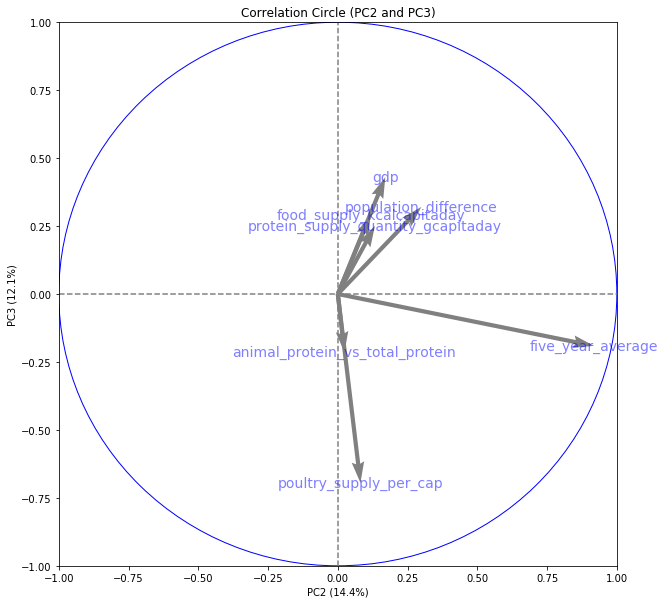

In [74]:

# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(X.columns),)

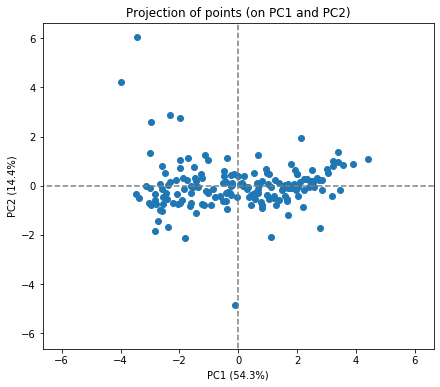

In [75]:

# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()




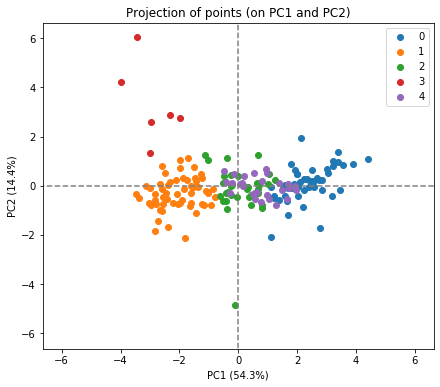

In [76]:


display_factorial_planes(X_projected, 7, pca, [(0,1)], 
                         illustrative_var = X_scaled_clustered["cluster"], alpha = 0.99)




## 3.4 K-Means Clustering

Selecting the number of clusters

In [77]:

# Import standard libraries
import pandas as pd
import numpy as np

# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Import functions created for this course
from functions import *

Perform Kmeans clustering

In [78]:

# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)


Put the cluster number on as a new column on the original data:

In [79]:

# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap,cluster
country,,,,,,,,
Sao Tome and Principe,0.619601,-0.780651,-1.316213,-0.920060,-0.622601,-0.446127,-0.677199,2
Kiribati,0.458781,0.385261,-0.397477,0.461685,-0.640965,-0.446127,-0.265578,1
Solomon Islands,1.288781,-0.876279,-1.381320,-0.996702,-0.619161,-0.446127,-0.936202,2
Djibouti,0.309326,-1.349097,-0.784262,-0.376997,-0.571862,1.445651,-1.013933,2
Guinea-Bissau,1.147331,-1.355169,-1.858774,-1.397430,-0.681295,-0.446127,-1.066629,2


In [81]:
#X_scaled_clustered.to_csv('centroid.csv')

Select number of clusters

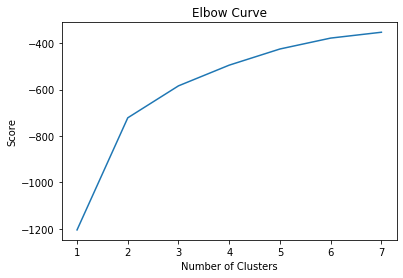

In [82]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 8
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [83]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [84]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
country,,,
Sao Tome and Principe,-1.986493,-0.686614,2
Kiribati,-0.242560,-0.392547,1
Solomon Islands,-2.408673,-0.526812,2
Djibouti,-1.968559,1.059946,2
Guinea-Bissau,-3.039815,-0.712086,2


In [85]:
from sklearn.metrics import silhouette_score




print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(X_reduceddf, kmeans.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.45772630360328614


In [86]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

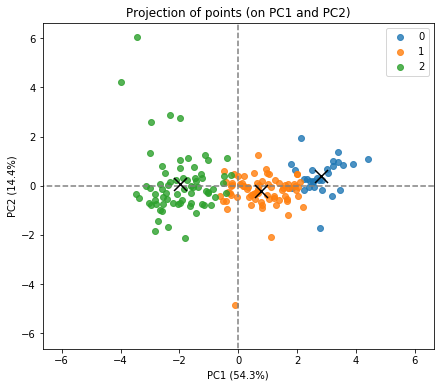

In [87]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

# 4. Statistical Tests

## 4.1 Adequecy Test-find data fitting normal distribution among 7 variables found above

* Use Kolmogorov-Smirnov test for goodness of fit. The Kolmogorov-Smirnov tests the null hypothesis that two distributions are identical.

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Sao Tome and Principe to China, mainland
Data columns (total 7 columns):
population_difference                 172 non-null float64
animal_protein_vs_total_protein       172 non-null float64
protein_supply_quantity_gcapitaday    172 non-null float64
food_supply_kcalcapitaday             172 non-null float64
gdp                                   172 non-null float64
five_year_average                     172 non-null float64
poultry_supply_per_cap                172 non-null float64
dtypes: float64(7)
memory usage: 10.8+ KB


Run test on population difference variable

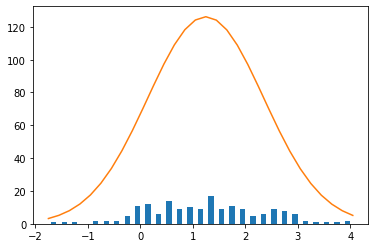

KstestResult(statistic=0.046307411222500705, pvalue=0.8544497116257054)

In [89]:
import numpy as np
from scipy.stats import norm, kstest
import matplotlib.pyplot as plt

#perform Kolmogorov-Smirnov test
data_population_difference = X.population_difference
loc, scale = norm.fit(data_population_difference)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_population_difference, bins=np.arange(data_population_difference.min(), data_population_difference.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_population_difference.min(), data_population_difference.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_population_difference, n.cdf)

In [90]:
# Since the p-value is more than .05, we accept the null hypothesis.
# data fits normal distribution

Rune test on animal protein portion variable

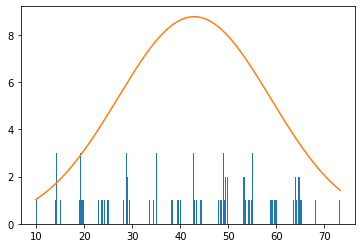

KstestResult(statistic=0.09564995309042579, pvalue=0.08043313394984095)

In [91]:
data_protein = X.animal_protein_vs_total_protein
loc, scale = norm.fit(data_protein)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_protein, bins=np.arange(data_protein.min(), data_protein.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_protein.min(), data_protein.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_protein, n.cdf)

In [92]:
# Since the p-value is more than .05, we accept the null hypothesis.
# data fits normal distribution

Reun test on protein supply quantity per capita variable

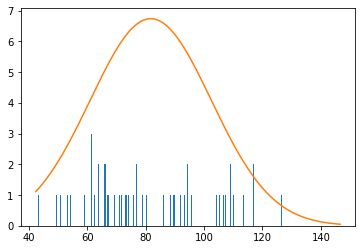

KstestResult(statistic=0.08267072420842447, pvalue=0.18021004014548658)

In [93]:
data_protein_supply= X.protein_supply_quantity_gcapitaday
loc, scale = norm.fit(data_protein_supply)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_protein_supply, bins=np.arange(data_protein_supply.min(), data_protein_supply.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_protein_supply.min(), data_protein_supply.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_protein_supply, n.cdf)

In [94]:
# Since the p-value is more than .05, we accept the null hypothesis.
# data fits normal distribution

Run test on food supply in terms of kcal variable

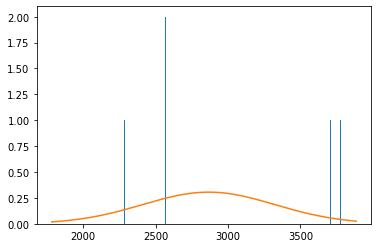

KstestResult(statistic=0.07680492370666236, pvalue=0.24972162199518655)

In [95]:
data_food_supply= X.food_supply_kcalcapitaday
loc, scale = norm.fit(data_food_supply)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_food_supply, bins=np.arange(data_food_supply.min(), data_food_supply.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_food_supply.min(), data_food_supply.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_food_supply, n.cdf)

In [96]:
# Since the p-value is more than .05, we accept the null hypothesis.
# data fits normal distribution

Run test on five year average of poultry supply variable

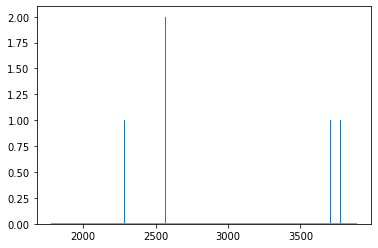

KstestResult(statistic=1.0, pvalue=0.0)

In [97]:
data_poultry_consumption_trend= X.five_year_average
loc, scale = norm.fit(data_poultry_consumption_trend)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_food_supply, bins=np.arange(data_food_supply.min(), data_food_supply.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_food_supply.min(), data_food_supply.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_food_supply, n.cdf)

In [98]:
# Since the p-value is less than .05, we accept the null hypothesis.
# data does not normal distribution

Run test on GDP variable

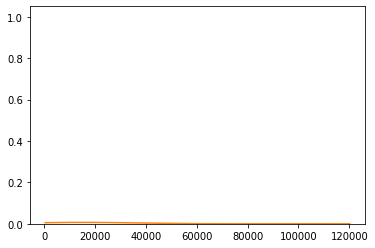

KstestResult(statistic=0.24626618281249313, pvalue=1.1318865642574712e-09)

In [99]:
data_gdp= X.gdp
loc, scale = norm.fit(data_gdp)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_gdp, bins=np.arange(data_gdp.min(), data_gdp.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_gdp.min(), data_gdp.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_gdp, n.cdf)

In [100]:
# Since the p-value is less than .05, we accept the null hypothesis.
# data does not normal distribution

Run test on Pultry Domestic Supply Per Capita variable

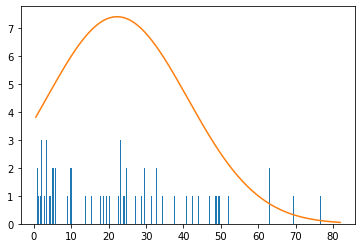

KstestResult(statistic=0.12457768152616977, pvalue=0.008733357205001985)

In [101]:
data_poultry_per_cap= X.poultry_supply_per_cap
loc, scale = norm.fit(data_poultry_per_cap)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.hist(data_poultry_per_cap, bins=np.arange(data_poultry_per_cap.min(), data_poultry_per_cap.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(data_poultry_per_cap.min(), data_poultry_per_cap.max()+0.2, 0.2)
plt.plot(x, 350*n.pdf(x))
plt.show()
kstest(data_poultry_per_cap, n.cdf)

In [102]:
# Since the p-value is less than .05, we accept the null hypothesis.
# data does not normal distribution

## 4.2 Guassian Test

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [103]:
X.head()

,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
country,,,,,,,
Sao Tome and Principe,1.932367,30.451542,54.480000,2447.000000,1968.732492,0.000000,9.478673
Kiribati,1.754386,49.014008,73.530000,3078.000000,1592.082641,0.000000,17.241379
Solomon Islands,2.672956,28.929042,53.130000,2412.000000,2039.282045,0.000000,4.594181
Djibouti,1.588983,21.401313,65.510000,2695.000000,3009.407574,0.125000,3.128259
Guinea-Bissau,2.516411,21.304650,43.230000,2229.000000,764.899506,0.000000,2.134472


In [104]:
X_info=X.reset_index()


In [105]:
X_cluster=X_scaled_clustered.reset_index()
X_cluster=X_cluster[['country','cluster']]
#X_cluster=X_cluster[(X_cluster['cluster'] >=3)]
X_cluster=pd.merge(X_cluster,X_info,on='country',how='inner')
X_cluster_0=X_cluster[(X_cluster['cluster'] ==0)]
X_cluster_1=X_cluster[(X_cluster['cluster'] ==1)]

In [106]:
X_cluster_0

,country,cluster,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
19,Iceland,0,0.898204,71.668487,146.480000,3656.000000,76624.485693,0.027778,29.673591
23,Luxembourg,0,2.027027,62.289935,108.300000,3470.000000,120137.955478,0.025000,18.211921
25,Malta,0,0.228311,56.781846,116.340000,3419.000000,33671.589348,0.019231,31.890661
34,"China, Macao SAR",0,1.444623,64.850037,109.360000,3326.000000,86248.547881,0.011905,34.810127
84,Lithuania,0,-1.546573,62.327089,126.510000,3410.000000,18583.568442,0.015709,29.632274
89,Norway,0,0.793051,59.957608,113.230000,3366.000000,81101.658048,0.011639,20.794305
93,Finland,0,0.217746,63.934565,117.980000,3340.000000,49955.341172,0.018269,20.822017
95,Ireland,0,1.388597,61.302682,117.450000,3885.000000,79661.622685,0.010937,26.146503
98,Switzerland,0,0.827815,62.801679,95.300000,3355.000000,82530.174862,0.003860,15.482055
103,Denmark,0,0.348918,68.139475,117.010000,3399.000000,61809.750887,0.060332,26.947149


In [107]:
X_cluster_1

,country,cluster,population_difference,animal_protein_vs_total_protein,protein_supply_quantity_gcapitaday,food_supply_kcalcapitaday,gdp,five_year_average,poultry_supply_per_cap
1,Kiribati,1,1.754386,49.014008,73.530000,3078.000000,1592.082641,0.000000,17.241379
5,Saint Kitts and Nevis,1,0.000000,64.222684,77.060000,2579.000000,18098.875957,0.000000,76.923077
8,Dominica,1,1.408451,55.548526,79.030000,2953.000000,7413.637732,0.062500,69.444444
9,Antigua and Barbuda,1,1.052632,64.747841,79.910000,2442.000000,15629.054576,0.000000,62.500000
10,Grenada,1,0.000000,56.683967,71.290000,2401.000000,10787.400403,0.008929,63.063063
...,...,...,...,...,...,...,...,...,...
165,Japan,1,-0.236073,55.681558,87.300000,2707.000000,39087.235938,0.013822,19.221396
167,Mexico,1,1.133222,48.972003,91.440000,3157.000000,9356.145765,0.034396,34.455706
168,Russian Federation,1,0.140177,54.826940,101.410000,3342.000000,11534.175152,0.023857,31.475153
169,Brazil,1,0.786686,56.199038,95.660000,3300.000000,8861.531858,0.021581,47.047534


* Compare Population Difference between clsuter 0 and clstuer 1

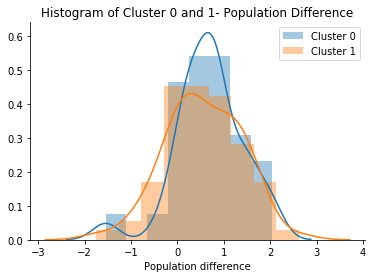

In [108]:
import seaborn as sns

clsuter_0_pop = X_cluster_0.population_difference.values
clsuter_1_pop = X_cluster_1.population_difference.values

sns.distplot(clsuter_0_pop, label ='Cluster 0')
sns.distplot(clsuter_1_pop, label = 'Cluster 1')
plt.legend()
plt.title('Histogram of Cluster 0 and 1- Population Difference')
plt.xlabel('Population difference')
sns.despine()


In [109]:
from scipy.stats import shapiro
stat, p = shapiro(clsuter_0_pop)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian, fail to reject H0')
else:
	print('Probably not Gaussian, fail to reject H1')
    
stat, p = shapiro(clsuter_1_pop)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian, fail to reject H0')
else:
	print('Probably not Gaussian,fail to reject H1')

stat=0.948, p=0.158
Probably Gaussian, fail to reject H0
stat=0.989, p=0.778
Probably Gaussian, fail to reject H0


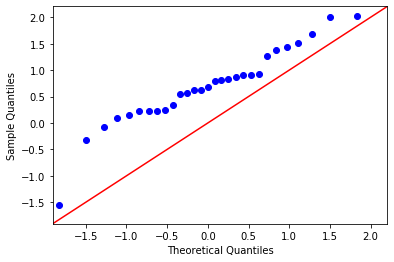

In [110]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(clsuter_0_pop, line='45')
pylab.show()

In [111]:
from scipy.stats import kstest, norm

ks_statistic, p_value = kstest(clsuter_0_pop, 'norm')
print(ks_statistic, p_value)

0.4358289450239874 1.5798600679711907e-05


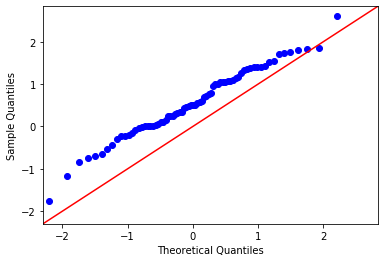

In [112]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(clsuter_1_pop, line='45')
pylab.show()

In [113]:
from scipy.stats import kstest, norm

ks_statistic, p_value = kstest(clsuter_1_pop, 'norm')
print(ks_statistic, p_value)

0.2943889993703141 4.216943924579781e-06
